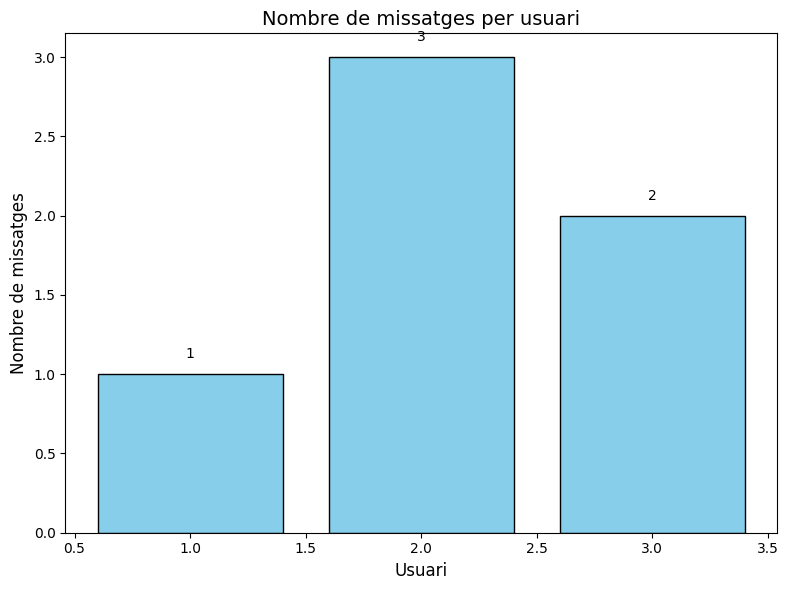

In [ ]:
import matplotlib.pyplot as plt
import json
import os
from datetime import datetime

# Llegim el fitxer JSON amb les dades del xat
with open("messages.json", "r") as f:
    dades = json.load(f)

# Extraurem els noms dels usuaris i el nombre de missatges
usuaris = [item["idUser"] for item in dades]  # Llista de noms d'usuaris
n_messages = [usuaris.count(user) for user in set(usuaris)]  # Nombre de missatges per usuari
usuaris_unics = list(set(usuaris))  # Llista d'usuaris únics

# Generem el gràfic de barres
plt.figure(figsize=(8, 6))  # Definim la mida del gràfic
plt.bar(usuaris_unics, n_messages, color='skyblue', edgecolor='black')  # Gràfic de barres

# Afegim títol i etiquetes
plt.title("Nombre de missatges per usuari", fontsize=14)
plt.xlabel("Usuari", fontsize=12)
plt.ylabel("Nombre de missatges", fontsize=12)

# Afegim valors sobre les barres
for i, v in enumerate(n_messages):
    plt.text(usuaris_unics[i], v + 0.1, str(int(v)), ha='center', fontsize=10)  # Mostrem el valor a sobre de cada barra

# Assegura't que la carpeta statImages existeix
if not os.path.exists('statImages'):
    os.makedirs('statImages')

# Genera un nom únic per al fitxer basat en la data i l'hora actuals
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f'statImages/grafic_{timestamp}.png'

# Guarda el gràfic a la carpeta statImages
plt.savefig(filename)

# Mostrem el gràfic
plt.tight_layout()  # Ajustem automàticament els marges
plt.show()